# Predicting Solubility from Molecular Structure with Regression

- Delaney, J.S., J. Chem. Inf. Comput. Sci. 2004, 44, 3, 1000–1005

In [13]:
import pandas as pd
import numpy as np

from rdkit import Chem
from rdkit.Chem import AllChem, Descriptors, Draw

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import GradientBoostingRegressor

from tools import helpers as h

COLUMN_NAMES = ['iupac', 'log_solubility', 'log_solubility_pred', 'SMILES']
sol_data = pd.read_csv('data/delaney.csv', names=COLUMN_NAMES, header=0)
sol_data.head(10)

,iupac,log_solubility,log_solubility_pred,SMILES
0,"1,1,1,2-Tetrachloroethane",-2.18,-2.794,ClCC(Cl)(Cl)Cl
1,"1,1,1-Trichloroethane",-2.00,-2.232,CC(Cl)(Cl)Cl
2,"1,1,2,2-Tetrachloroethane",-1.74,-2.549,ClC(Cl)C(Cl)Cl
3,"1,1,2-Trichloroethane",-1.48,-1.961,ClCC(Cl)Cl
4,"1,1,2-Trichlorotrifluoroethane",-3.04,-3.077,FC(F)(Cl)C(F)(Cl)Cl
5,"1,1-Dichloroethane",-1.29,-1.576,CC(Cl)Cl
6,"1,1-Dichloroethylene",-1.64,-1.939,ClC(=C)Cl
7,"1,1-Diethoxyethane",-0.43,-0.899,CCOC(C)OCC
8,"1,2,3,4-Tetrachlorobenzene",-4.57,-4.546,Clc1ccc(Cl)c(Cl)c1Cl
9,"1,2,3,4-Tetrahydronapthalene",-4.37,-3.447,C1CCc2ccccc2C1


In [2]:
sol_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1144 entries, 0 to 1143
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   iupac                1144 non-null   object 
 1   log_solubility       1144 non-null   float64
 2   log_solubility_pred  1144 non-null   float64
 3   SMILES               1144 non-null   object 
dtypes: float64(2), object(2)
memory usage: 35.9+ KB


Solubilities are measured in mol/L

In [26]:
# Data for molecule preprocessing
target = sol_data.iloc[:, 1]
molecules = [Chem.MolFromSmiles(smi) for smi in sol_data.SMILES]

# Set name of molecule
for i, mol in enumerate(molecules):
    mol.SetProp('_Name', sol_data.iupac.iloc[i])

feature_array = h.get_feature_array(molecules)

X = feature_array.to_numpy()
y = target.to_numpy()

print(f"X.shape = {X.shape}\ny.shape = {y.shape}")

X.shape = (1144, 4)
y.shape = (1144,)


/Users/iansharff/opt/anaconda3/envs/chem-env/lib/python3.7/site-packages/rdkit/Chem/Draw/IPythonConsole.py:192: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  % (maxMols))


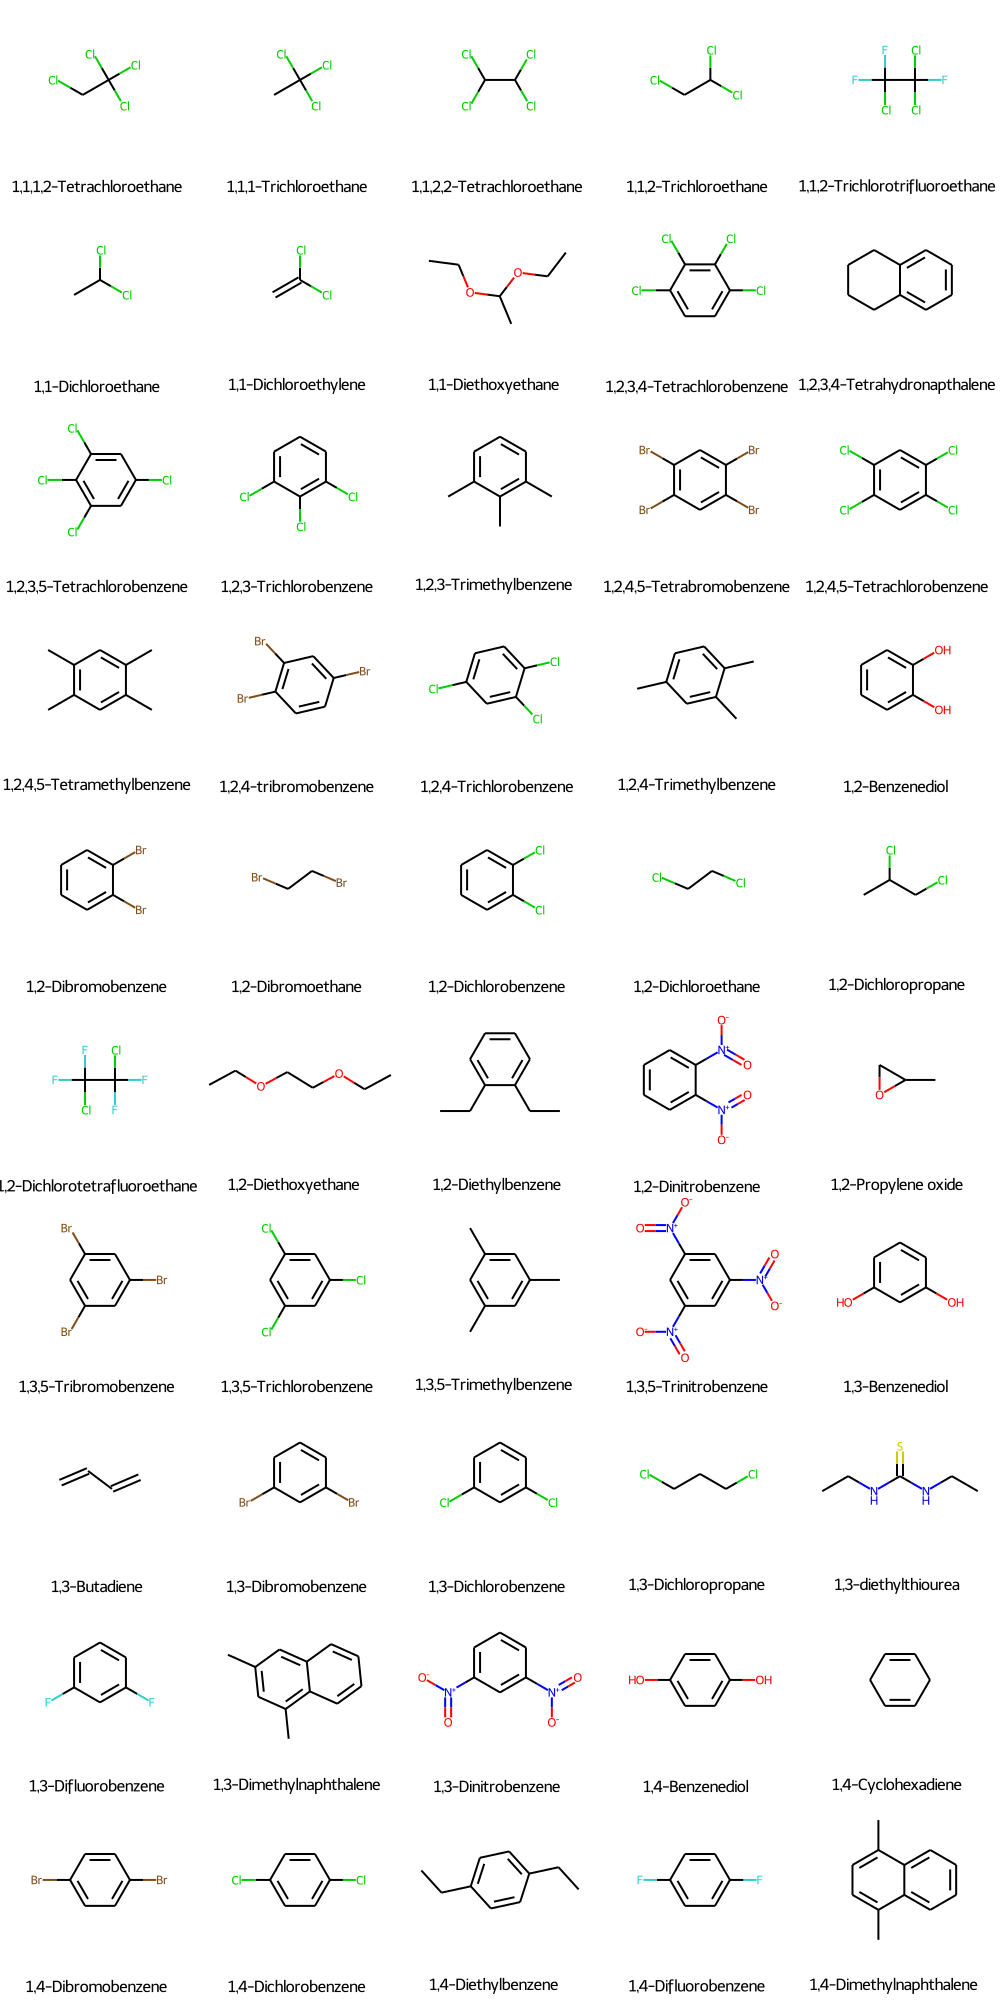

In [27]:
img = Draw.MolsToGridImage(molecules, molsPerRow=5, legends=[mol.GetProp('_Name') for mol in molecules])
img
# for i, mol in enumerate(sample_molecules):
#     print(sol_data['iupac'][i])
#     display(mol)

### Calculating Predictors
- cLogP (Octanol-water partition coefficient)
- MW (molecular weight)
- RB (number of rotatable bonds)
- AP (Aromatic proportion = number of aromatic atoms / number of heavy atoms)